# Prediciendo usando un data set precargado desde Scikit-lean

## Descripción

Se usa un set de datos que viene pre cargado en scikit-learn que tiene relación con la diabetes.

La base se toma desde: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py


## Conceptos previos

La regresión lineal simple y la correlación lineal son 2 métodos estadísticos que estudia la relación lineal existente entre dos o más variables. Sin embargo, ambos métodos presentan diferencias:

+ La correlación cuantifica cómo es la relación entre lasvariables, mientras que la regresión lineal consiste en generar una ecuación (modelo) que, basándose en la relación existente entre las variables, permita predecir el valor de una a partir de la otra.

+ El cálculo de la correlación entre dos variables es independiente del orden o asignación de cada variable a X e Y, mide únicamente la relación entre ambas sin considerar dependencias. En el caso de la regresión lineal, el modelo varía según qué variable se considere dependiente de la otra (lo cual no implica causa-efecto).

+ Desde la persectiva experimental, es común utilizar la correlación cuando ninguna de las variables se ha controlado, simplemente se han medido ambas y se desea saber si están relacionadas. En el caso de estudios de regresión lineal, es más común que una de las variables se controle (tiempo, concentración de reactivo, temperatura…) y se mida la otra.

+ Por norma general, los estudios de correlación lineal preceden a la generación de modelos de regresión lineal. Primero se analiza si ambas variables están correlacionadas y, en caso de estarlo, se procede a generar el modelo de regresión.

### Correlación lineal y Coeficiente de correlación

Para estudiar la relación lineal existente entre 2 variables continuas es necesario sidponer de parámetros que permitan cuantificar dicha relación. Uno de estos parámetros es la covarianza, la que indica el grado de variación conjunto de 2 variables aleatorias.

Esta covarianza depende de las escalas en que se miden las variables en estudio, por lo tanto, no es comparable entre distintos pares de variables. Para poder hacer comparaciones se estandariza la covarianza, generando lo que conoce como ***cieficientes de correlación***.

Existen diferentes tipos, entre los que se cuentan el coeficiente de Pearson, Rho de Spearman. Todos varían entre 1 y -1. La interpretación: 1 es una correlación positiva perfecta y -1 una correlación negativa perfecta. Estos coeficientes se utilizan como medida de fuerza de asociación usando la escala:

+ 0 : asociación nula
+ 0.1 : asociación pequeña
+ 0.3 : asociación mediana
+ 0.5 : asociación moderada
+ 0.7 : asociación alta
+ 0.9 : asociación muy alta

***Correlación de Pearson*** funciona bien con variables cuantitativas que tienen una distribución normal.

***Correlación de Spearman*** se emplea cuando los datos son ordinales, de intervalo o bien cuando no se satosface la condición de normalidad para variables continuas y los datos se pueden transformar a rangos.

La correlación lineal entre dos variables, además del valor del coeficiente de correlación y de sus significancia, también tiene un tamaño de efecto asociado Se conoce como coeficiente de determinación $R^{2}$. Se interpreta como la cantidad de varianza de Y explicada por X. En el caso del coeficiente de Pearson y el de Spearman, $R^{2}$ se obtiene elevando al cuadrado el coeficiente de correlación. 

In [3]:
import pandas as pd
data_frame = pd.read_csv("Cars93.csv")
data_frame.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [97]:
# Número de observaciones
data_frame.shape

(93, 28)

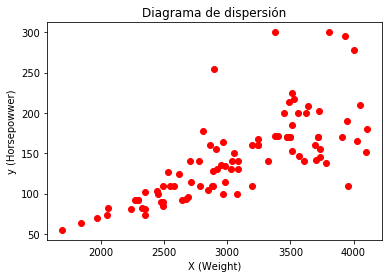

In [10]:
# Gráficas de la ecuación de regresión
plt.scatter(data_frame.Weight, data_frame.Horsepower,  color='red')
plt.title("Diagrama de dispersión")
plt.xlabel("X (Weight)")
plt.ylabel("y (Horsepowwer)")

plt.show()

In [102]:
data_frame[data_frame.Horsepower.isin(range(50,60))]

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
38,39,Geo,Metro,Small,6.7,8.4,10.0,46,50,None,...,4,151,93,63,34,27.5,10.0,1695,non-USA,Geo Metro


In [103]:
data_frame[data_frame.Horsepower >= 250]

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
10,11,Cadillac,Seville,Midsize,37.5,40.1,42.7,16,25,Driver & Passenger,...,5,204,111,74,44,31.0,14.0,3935,USA,Cadillac Seville
18,19,Chevrolet,Corvette,Sporty,34.6,38.0,41.5,17,25,Driver only,...,2,179,96,74,43,NaN,NaN,3380,USA,Chevrolet Corvette
27,28,Dodge,Stealth,Sporty,18.5,25.8,33.1,18,24,Driver only,...,4,180,97,72,40,20.0,11.0,3805,USA,Dodge Stealth
47,48,Infiniti,Q45,Midsize,45.4,47.9,50.4,17,22,Driver only,...,5,200,113,72,42,29.0,15.0,4000,non-USA,Infiniti Q45
56,57,Mazda,RX-7,Sporty,32.5,32.5,32.5,17,25,Driver only,...,2,169,96,69,37,NaN,NaN,2895,non-USA,Mazda RX-7


El diagrama de dispersión parece indicar una posible relación lineal positiva entre ambas variables.

Para poder elegir el coeficiente de correlación adecuado, se tiene que analizar el tipo de variables y la distribución que presentan. En este caso, ambas variables son cuantitativas continuas y pueden transformarse en rangos para ordenarlas, por lo que a priori los 2 coeficientes podrían aplicarse. La elección se hará en función de la distribución que presenten las observaciones.


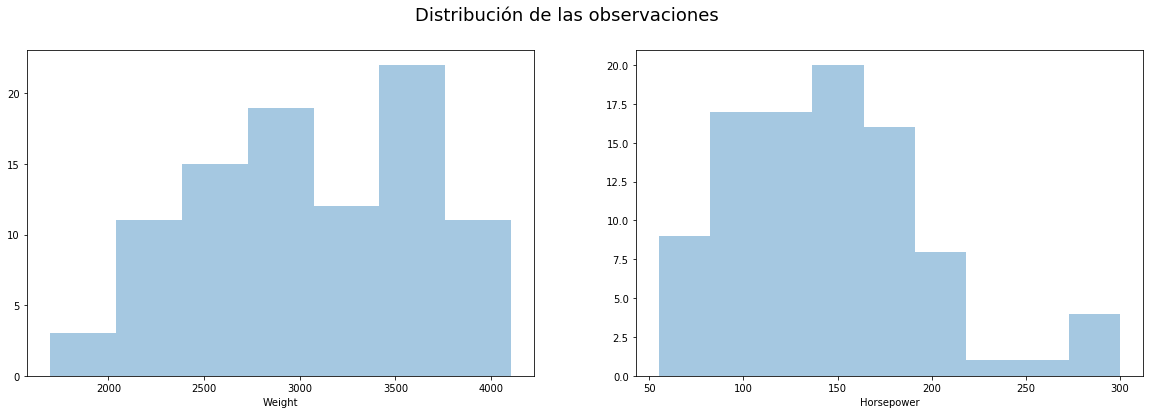

In [17]:
import seaborn as sns
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle("Distribución de las observaciones", fontsize=18)
sns.distplot(data_frame.Weight, ax=ax[0], kde=False)
sns.distplot(data_frame.Horsepower, ax=ax[1], kde=False)
plt.show()

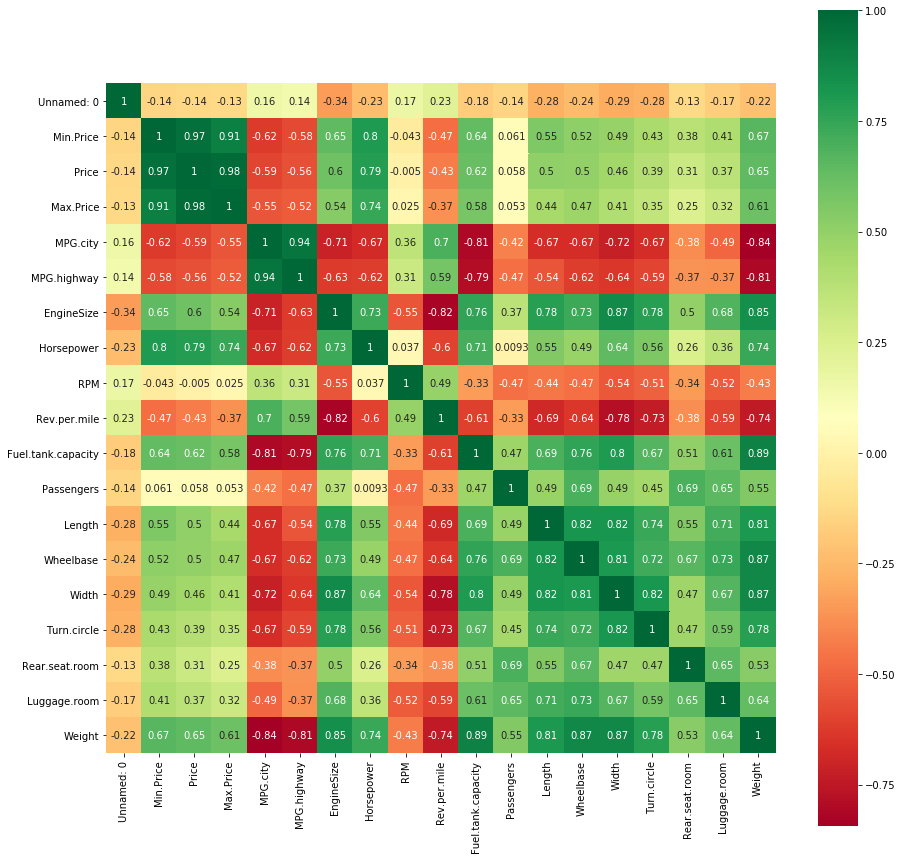

In [34]:
## Correlación de las variables
plt.figure(figsize=(15,15))
p=sns.heatmap(data_frame.corr(method="pearson"), annot=True,cmap='RdYlGn',square=True)

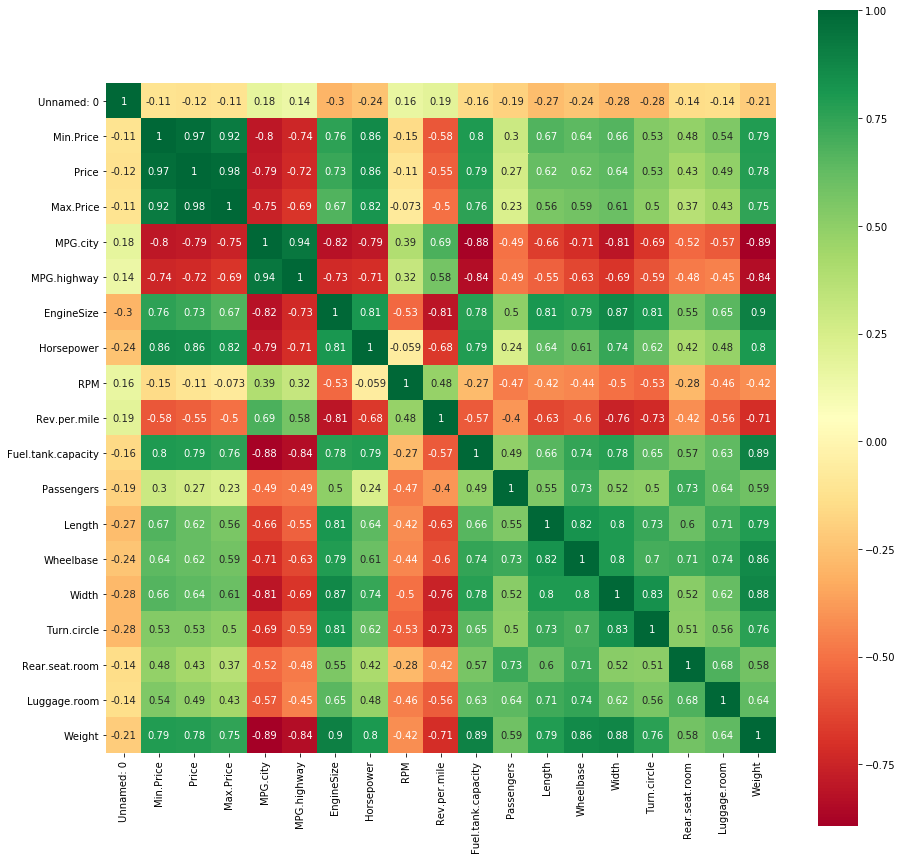

In [36]:
## Correlación de las variables usando spearman
plt.figure(figsize=(15,15))
p=sns.heatmap(data_frame.corr(method="spearman"), annot=True,cmap='RdYlGn',square=True)

## Diferencias entre ambos coeficientes

https://support.minitab.com/es-mx/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/correlation-and-covariance/a-comparison-of-the-pearson-and-spearman-correlation-methods/

## Aplicación de regresión lineal

Se va a predecir el valor de los caballos de fuerza del vehiculo (Horsepower) a partir del peso del vehículo (weight)

Lo que va a suceder es que se debe armar una euación de una recta de la forma:

$y = a + b_{1}x_{1}$

De esta forma se tiene una variable indepediente (que es la que será predecida) y una variable independiente (predictora)

### ¿Qué va a hacer el algoritmo?

Va a encontrar valores para los coeficientes de la ecuación; va a encontrar de acuerdo al mejor ajuste, minimizando el error.

In [139]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Selección de las variables predictoras y predecida

In [111]:
X = data_frame.Weight
y = data_frame.Horsepower
print("Shape of X :", X.shape, "Shape of y:", y.shape)

Shape of X : (93,) Shape of y: (93,)


### Evitando el overfitting

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [113]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

X_train.shape

(74, 1)

## Creación del modelo 

In [114]:
# Create linear regression object
modelo = linear_model.LinearRegression()

## Entrenamiento del modelo

In [115]:
# Train the model using the training sets
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Validación del modelo

In [117]:
# Make predictions using the testing set
y_pred = modelo.predict(X_test)

### Evaluación del modelo

In [143]:
# The coefficients
print('Coeficientes: \n\tb1 =', modelo.coef_, 'a =', modelo.intercept_)
# The mean squared error
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))
print('Score del modelo (train): %.2f' % modelo.score(X_train, y_train)) # Return the coefficient of determination  of the prediction.
print('Score del modelo (test): %.2f' % modelo.score(X_test, y_test)) 

Coeficientes: 
	b1 = [938.23786125] a = 152.91886182616167
Mean squared error (MSE): 4384.59
Coeficiente de determinación: 0.35
Score del modelo (train): 0.32
Score del modelo (test): 0.38


### Existe una librería en Python que permite aplicar regresión lineal

statmodels : https://www.statsmodels.org/stable/index.html

In [120]:
import statsmodels.api as sm
y = data_frame.Horsepower
X = data_frame.Weight
modelo = sm.OLS(y, X)
resultado = modelo.fit()
print(resultado.summary())

                                 OLS Regression Results                                
Dep. Variable:             Horsepower   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              1503.
Date:                Tue, 12 Jan 2021   Prob (F-statistic):                    8.68e-59
Time:                        21:32:37   Log-Likelihood:                         -467.12
No. Observations:                  93   AIC:                                      936.2
Df Residuals:                      92   BIC:                                      938.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [144]:
print('Parameters: ', resultado.params)
print('R2: ', resultado.rsquared)
print('Standard errors: ', resultado.bse)
print('Predicted values\n', resultado.predict())
# Valores reales
print('Real values\n', y)

Parameters:  [949.43526038]
R2:  0.07014495798864573
Standard errors:  [164.60971285]
Predicted values
 [ 58.5765539  -48.87128874  42.20354931 -11.00871562 -34.54490972
 -38.63816087 -44.77803759  -1.79890053  58.5765539   37.08698537
 -79.57067235  16.62072963 -27.38172021  -1.79890053 -24.31178185
 -17.14859234  40.15692373  11.5041657   -9.98540283 -17.14859234
 -53.98785267 -21.24184349  -3.84552611  57.55324111  34.01704701
 -12.0320284  -73.43079562  56.52992833 -20.2185307   -5.89215168
  42.20354931 -62.17435497 118.95200833 -47.84797595 -60.12772939
 -29.42834578  21.73729357  10.48085291  67.78636898  13.55079127
  -7.93877725 -64.22098054  -9.98540283 -22.26515627  64.71643062
 -33.52159693 -11.00871562 -69.33754448 -39.66147365  13.55079127
  -6.91546447  15.59741685  -8.96209004 -15.10196676  23.78391914
 -46.82466316  39.13361095 -60.12772939 -61.15104218 -24.31178185
  -3.84552611   4.34097619  -6.91546447 -35.5682225  -24.31178185
 -23.28846906 -17.14859234 -14.0786539

## Caso de aplicación - Set de datos de diabetes

En este caso se va a experimentar seleccionando, manualmente, los conjuntos de entrenamiento y validación y considerando la selección aleatoria.

In [145]:
# Carga del dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [146]:
type(diabetes_X)

numpy.ndarray

In [147]:
# Se muestran los datos
pd.DataFrame(diabetes_X)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [148]:
# Medidas estadísticas
pd.DataFrame(diabetes_X).describe()

,0,1,2,3,4,5,6,7,8,9
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


## Descripción del set de datos

https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset

In [150]:
# Se muestran los datos
pd.DataFrame(diabetes_y)

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


In [151]:
pd.DataFrame(diabetes_y).describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


### Comentarios
Del resulatdo anterior es posible apreciar que se tienen 442 observaciones con 10 características y una variable independiente (y)

$y = a + b_{1}x_{1} + b_{2}x_{2} + \ldots + b_{10}x_{10}$

donde $x_{1}$ representa a cada una de las características que se incluyen en el set de datos.

Sin embargo, para simplificar el problema solo se va a trabajar con una de las características, dejando la ecuación de la forma:

$y = a + b_{1}x_{1}$

De esta forma se tiene una variable indepediente (que es la que será predecida) y una variable independiente (predictora)

In [152]:
# Se selecciona una de las características
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

### Comentarios

En el código anterior se selecciona una de las características y se divide el set de datos en 2 subconjuntos: entrenamiento y validación. 

Por ahora esta división se realiza de manera fija, más adelante se verá que esto se debe hacer de forma aleatoria.

La misma división se hace con el conjunto de datos de la variable predecible

In [153]:
# Create linear regression object
modelo = linear_model.LinearRegression()

# Train the model using the training sets
modelo.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = modelo.predict(diabetes_X_test)

# The coefficients
print('Coeficientes: \n b1=', modelo.coef_, 'a=', modelo.intercept_)
# The mean squared error
print('Mean squared error (MSE): %.2f' % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))
print('Score del modelo: %.2f' % modelo.score(diabetes_X_train, diabetes_y_train))
print('Score del modelo *: %.2f' % modelo.score(diabetes_X_test, diabetes_y_test))

Coeficientes: 
 b1= [938.23786125] a= 152.91886182616167
Mean squared error (MSE): 2548.07
Coeficiente de determinación: 0.47
Score del modelo: 0.34
Score del modelo *: 0.47


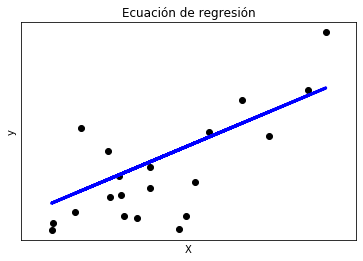

In [154]:
# Gráficas de la ecuación de regresión
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.title("Ecuación de regresión")
plt.xlabel("X")
plt.ylabel("y")

plt.show()

### Comentarios

Observando el gráfico anterior es posible ver que hay varios puntos que se alejan un poco de la ecuación de la recta de regresión; eso explica el coeficiente de determinación que se obtuvo ($R^{2}$).

El valor de $R^{2}$ de un 0.47 indica que hay un 47% de confiabilidad en la predicción.

Para ver el ejercicio completo se va a realizar una predicción y para ellos se va a tomar un valor del mismo set de datos original; en este caso será la primera observación

In [65]:
print("Predicción:", modelo.predict([[0.061696]]))
print("Valor real:", diabetes_y[0])

Predicción: [210.80438491]
Valor real: 151.0


## Usando la librería statmodels (usando OLS, Ordinary Least Squares)

In [131]:
import statsmodels.api as sm
modelo_diabetes = sm.OLS(diabetes_y, diabetes_X)
resultado = modelo_diabetes.fit()
print(resultado.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.070
Model:                            OLS   Adj. R-squared (uncentered):              0.068
Method:                 Least Squares   F-statistic:                              33.27
Date:                Tue, 12 Jan 2021   Prob (F-statistic):                    1.51e-08
Time:                        21:59:16   Log-Likelihood:                         -2882.5
No. Observations:                 442   AIC:                                      5767.
Df Residuals:                     441   BIC:                                      5771.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Para seguir avanzando

Revisar la documentación: https://scikit-learn.org/stable/modules/model_evaluation.html

## Mejoras

Como se mencionó es importante que el modelo cuente con 2 conjuntos de datos: entrenamiento y validación. En el ejercicio de acá se dividieron arbitrariamente los conjuntos.

Ahora se va a aleatorizar la selección y se volverá a entrenar y evaluar el modelo

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes_X, diabetes_y, test_size=0.2, random_state=29)

# Crea el modelo
modelo_x = linear_model.LinearRegression()
# Entrena el modelo
modelo_x.fit(X_train, y_train)
# Valida el modelo
y_pred = modelo_x.predict(X_test)

# Evaluación del modelo
print('Mean squared error (MSE): %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))
print('Score del modelo: %.2f' % modelo_x.score(X_test, y_test))

Mean squared error (MSE): 4384.59
Coeficiente de determinación: 0.35
Score del modelo: 0.35


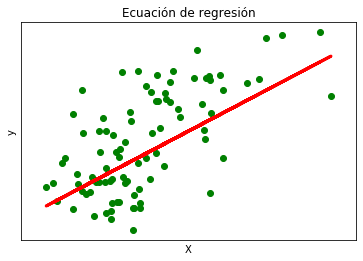

In [156]:
# Gráficas de la ecuación de regresión
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.title("Ecuación de regresión")
plt.xlabel("X")
plt.ylabel("y")

plt.show()

Se dibujan ambas ecuaciones en el mismo gráfico

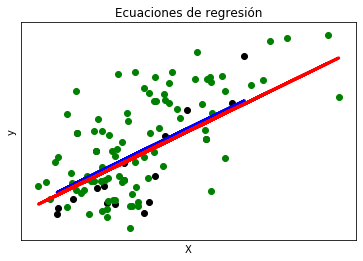

In [157]:
# Gráficas de la ecuación de regresión
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.title("Ecuaciones de regresión")
plt.xlabel("X")
plt.ylabel("y")

plt.show()

In [158]:
print("Predicción:", modelo_x.predict([[0.061696]]))
print("Valor real:", diabetes_y[0])

Predicción: [205.64573805]
Valor real: 151.0
